# 2022-12-19
## AdaBoost and GradientBoost

In [2]:
from scipy.stats import randint, truncnorm, uniform
from sklearn import datasets, tree
from sklearn.datasets import load_diabetes
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor, RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.tree import DecisionTreeRegressor

In [3]:
# Load data
diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target
print(X.shape)

(442, 10)


In [4]:
# splitting data

x_train, x_test, y_train, y_test = train_test_split(X, y)

In [5]:
# training Decision Tree with default params

clf = DecisionTreeRegressor()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print(mean_squared_error(y_test, y_pred))

7816.207207207207


In [6]:
# training Random Forrest with default params

clf = RandomForestRegressor()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print(mean_squared_error(y_test, y_pred))

3232.4147486486486


In [7]:
# training AdaBoost with default params

clf = AdaBoostRegressor()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print(mean_squared_error(y_test, y_pred))

3428.0792146747763


In [8]:
# training AdaBoost with different BaseEstimator

clf = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=1))
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print(mean_squared_error(y_test, y_pred))

3811.6187256394337


/Users/dqmis/github/code_academy_ai_course/.venv/lib/python3.9/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [9]:
clf.estimators_[1]

DecisionTreeRegressor(max_depth=1, random_state=1110579405)

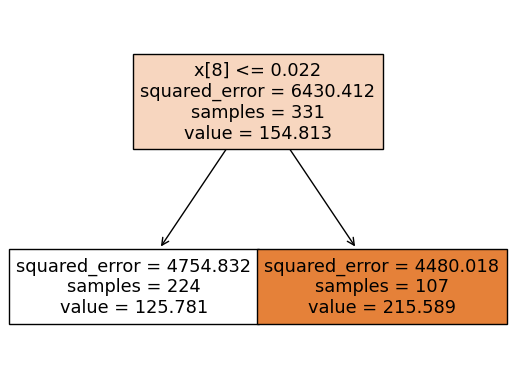

In [10]:
_ = tree.plot_tree(clf.estimators_[1], filled=True)

In [11]:
params = {
    "n_estimators": randint(5, 500),
    "base_estimator__min_samples_leaf": randint(1, 500),
    "base_estimator__max_depth": randint(1, 100),
    "base_estimator__min_samples_split": uniform(0.01, 0.199),
}


DTR = DecisionTreeRegressor()
forrest = AdaBoostRegressor(base_estimator=DTR)

search = RandomizedSearchCV(
    forrest, params, n_iter=200, cv=15, random_state=42, scoring="neg_mean_squared_error"
)

search.fit(x_train, y_train)

/Users/dqmis/github/code_academy_ai_course/.venv/lib/python3.9/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/dqmis/github/code_academy_ai_course/.venv/lib/python3.9/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/dqmis/github/code_academy_ai_course/.venv/lib/python3.9/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/dqmis/github/code_academy_ai_course/.venv/lib/python3.9/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/dqmis/github/code_academy_ai_course/.venv/lib/python3.9/site-packages/sklearn/ensembl

KeyboardInterrupt: 

In [ ]:
search.best_estimator_.get_params()

{'base_estimator__ccp_alpha': 0.0,
 'base_estimator__criterion': 'squared_error',
 'base_estimator__max_depth': 2,
 'base_estimator__max_features': None,
 'base_estimator__max_leaf_nodes': None,
 'base_estimator__min_impurity_decrease': 0.0,
 'base_estimator__min_samples_leaf': 53,
 'base_estimator__min_samples_split': 0.10740109929523504,
 'base_estimator__min_weight_fraction_leaf': 0.0,
 'base_estimator__random_state': None,
 'base_estimator__splitter': 'best',
 'base_estimator': DecisionTreeRegressor(max_depth=2, min_samples_leaf=53,
                       min_samples_split=0.10740109929523504),
 'estimator': None,
 'learning_rate': 1.0,
 'loss': 'linear',
 'n_estimators': 164,
 'random_state': None}

In [ ]:
clf = AdaBoostRegressor(
    DecisionTreeRegressor(
        max_depth=29, min_samples_split=0.19762786054103823, min_samples_leaf=36
    ),
    n_estimators=331,
)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print(mean_squared_error(y_test, y_pred))

3493.557751421941


In [ ]:
clf.estimators_[0]

DecisionTreeRegressor(max_depth=29, min_samples_leaf=36,
                      min_samples_split=0.19762786054103823,
                      random_state=2109409304)

In [ ]:
# training GB with default params

clf = GradientBoostingRegressor()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print(mean_squared_error(y_test, y_pred))

3831.778733557954


In [ ]:
params = {
    "n_estimators": randint(10, 1000),
    "learning_rate": uniform(0.0001, 0.1),
    "min_samples_leaf": randint(1, 500),
    "max_depth": randint(1, 100),
    "min_samples_split": uniform(0.01, 0.199),
}


forrest = GradientBoostingRegressor()

search = RandomizedSearchCV(
    forrest,
    params,
    n_iter=200,
    cv=15,
    random_state=42,
    scoring="neg_mean_squared_error",
    n_jobs=-1,
)

search.fit(x_train, y_train)

RandomizedSearchCV(cv=15, estimator=GradientBoostingRegressor(), n_iter=200,
                   n_jobs=-1,
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x1390fa3a0>,
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x1390fe0d0>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x138cd5460>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x138cd5a90>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x1390f0f70>},
                   random_state=42, scoring='neg_mean_squared_error')

In [ ]:
clf = GradientBoostingRegressor(**search.best_estimator_.get_params())
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print(mean_squared_error(y_test, y_pred))

3340.6853219073696


In [ ]:
search.best_estimator_.get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.022964280550346272,
 'loss': 'squared_error',
 'max_depth': 32,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 34,
 'min_samples_split': 0.08127438088853525,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 81,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

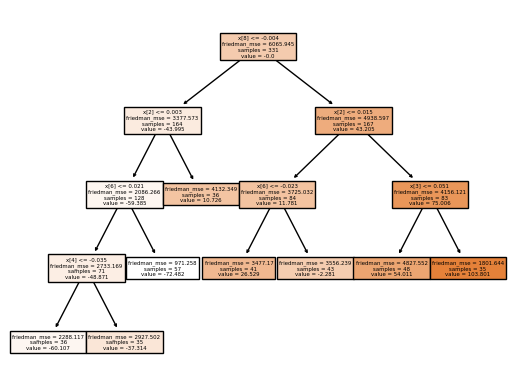

In [ ]:
_ = tree.plot_tree(clf.estimators_[0][0], filled=True)